In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
from google.colab import files
files.upload()

Saving Fake.csv to Fake.csv


In [ ]:
fake_data = pd.read_csv('Fake.csv')
fake_data

In [10]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
from google.colab import files
files.upload()

Saving True.csv to True.csv


In [13]:
real_data = pd.read_csv('True.csv')
real_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [14]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [78]:
fake_data["class"] = 0

In [79]:
real_data["class"] = 1

In [80]:
fake_data.shape

(23481, 5)

In [81]:
real_data.shape

(21417, 5)

In [17]:
data_merge = pd.concat([fake_data, real_data], axis = 0)

In [18]:
data_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [19]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [21]:
data = data_merge.drop(columns = ['title', 'subject', 'date'], axis = 1)

In [25]:
data.columns

Index(['text', 'class'], dtype='object')

In [28]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [29]:
data.isnull().sum()

text     0
class    0
dtype: int64

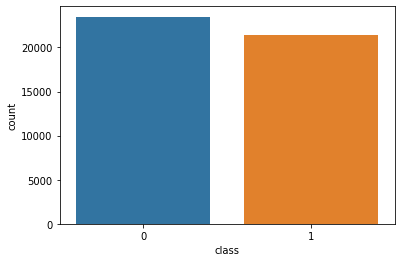

In [30]:
sns.countplot(x = 'class', data = data)

In [63]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [64]:
fake_text = ' '.join(fake_data['title']) + ' '.join(fake_data['text'])
real_text = ' '.join(real_data['title']) + ' '.join(real_data['text'])


In [65]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

wordcloud_fake = WordCloud(stopwords=ENGLISH_STOP_WORDS,
                           background_color='white', 
                           width=1200, height=1000).generate(fake_text)
wordcloud_real = WordCloud(stopwords=ENGLISH_STOP_WORDS,
                           background_color='white', 
                           width=1200, height=1000).generate(real_text)


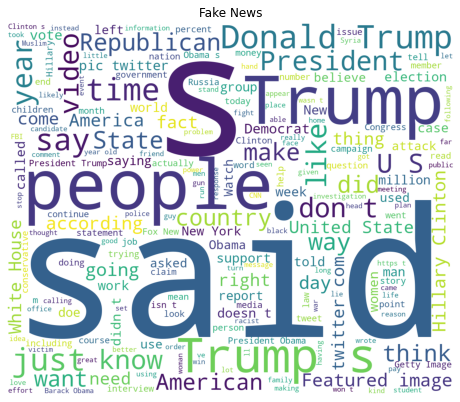

In [77]:
plt.figure(figsize = [8, 7])
plt.imshow(wordcloud_fake)
plt.axis('off')
plt.title('Fake News')
plt.show()

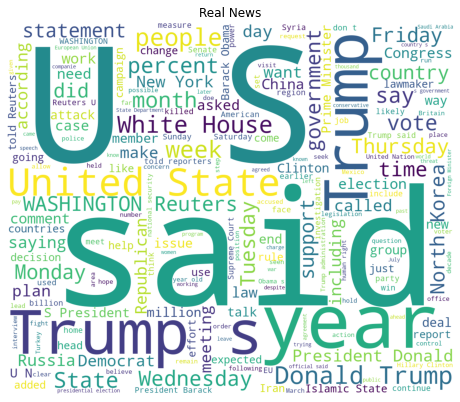

In [67]:
plt.figure(figsize = [8, 7])
plt.imshow(wordcloud_real)
plt.axis('off')
plt.title('Real News')
plt.show()

In [68]:
X = data['text']
Y = data['class']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

In [71]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(XV_train, Y_train)

RandomForestClassifier(random_state=0)

In [72]:
from sklearn.metrics import accuracy_score

XV_train_prediction=RFC.predict(XV_train)
training_data_accuracy=accuracy_score(XV_train_prediction, Y_train)

In [73]:
print('accuracy on training data:', training_data_accuracy)

accuracy on training data: 0.9999752524252623


In [74]:
XV_test_prediction = RFC.predict(XV_test)
testing_data_accuracy = accuracy_score(XV_test_prediction, Y_test)

In [75]:
print('accuracy on testing data:', testing_data_accuracy)

accuracy on testing data: 0.989532293986637
